<a href="https://colab.research.google.com/github/gulamkibria775/Data_science_project/blob/main/Data_science_project%20/Deep_learning/Mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [16]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

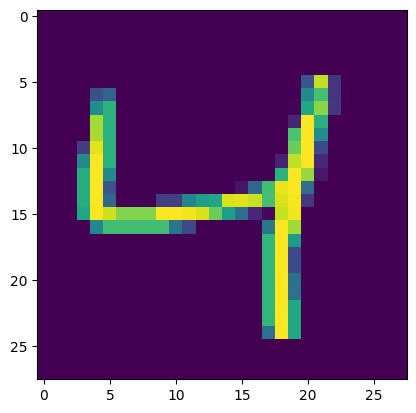

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

In [20]:
x_train=x_train/255
x_test=x_test/255


In [21]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,epochs=25,validation_split=.2)

Epoch 1/25
1500/1500 [==============================] - 11s 6ms/step - loss: 0.2903 - accuracy: 0.9156 - val_loss: 0.1671 - val_accuracy: 0.9511
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1235 - accuracy: 0.9626 - val_loss: 0.1200 - val_accuracy: 0.9647
Epoch 3/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0850 - accuracy: 0.9742 - val_loss: 0.0985 - val_accuracy: 0.9703
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0897 - val_accuracy: 0.9737
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0495 - accuracy: 0.9839 - val_loss: 0.0891 - val_accuracy: 0.9746
Epoch 6/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0415 - accuracy: 0.9859 - val_loss: 0.0970 - val_accuracy: 0.9730
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0323 - accuracy: 0.9898 - val_loss: 0.1026 - val_accuracy

In [26]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [30]:
y_prob

array([[3.90914921e-14, 1.32590152e-12, 1.95560040e-13, ...,
        9.99999940e-01, 3.00774190e-13, 3.75449671e-11],
       [7.66072013e-15, 2.10311803e-12, 9.99999940e-01, ...,
        7.80468559e-25, 3.67610317e-11, 3.03395021e-18],
       [6.37444835e-17, 9.99999940e-01, 2.26710775e-10, ...,
        1.72730417e-08, 2.24491847e-09, 5.20056350e-12],
       ...,
       [4.53619239e-24, 6.80702539e-19, 4.49782140e-23, ...,
        1.94241460e-13, 4.52778650e-18, 1.23049793e-10],
       [1.09305404e-19, 1.30687210e-20, 6.67339974e-28, ...,
        1.62660717e-14, 2.26120186e-12, 2.19152679e-24],
       [1.29895439e-09, 1.07782535e-26, 2.41842624e-16, ...,
        2.68651977e-23, 1.37631776e-16, 1.36670331e-21]], dtype=float32)

In [27]:
y_pred=y_prob.argmax(axis=1)

In [31]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777

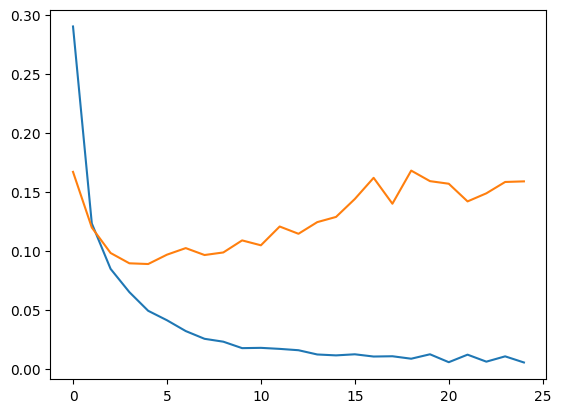

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

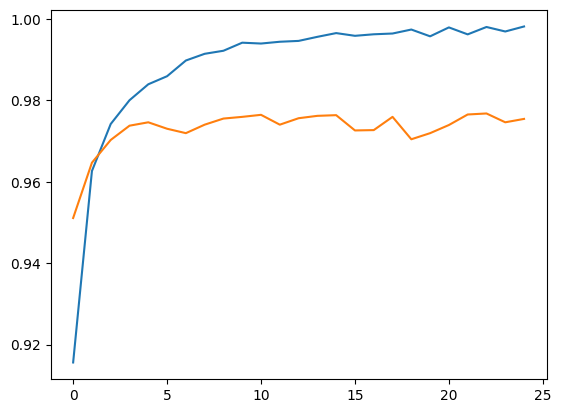

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

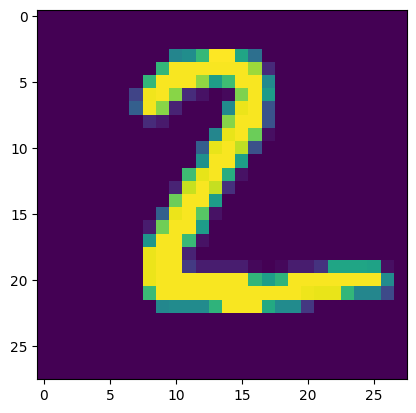

In [35]:
plt.imshow(x_test[1])

In [36]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 35ms/step


array([2])